# Earth's Mixing Ratio

In this notebook, we explore the utility of using a constant Earth mixing ratio as a "first-order approximation" for scenarios where the actual mixing ratio is non-constant. We specifically aim to demonstrate that this approximation can significantly facilitate the implementation of a multiregression model. By maintaining a constant mixing ratio, we reduce the complexity of the input variables and enhance the model's ability to focus on pattern recognition and feature extraction.

# Imports

In [9]:
import pandas as pd                     
from matplotlib import pyplot as plt   
from matplotlib.lines import Line2D 

from geexhp import datavis, datamod, datagen
datavis.configure_matplotlib()

# Present Earth

In [2]:
dg = datagen.DataGen()
config = dg.config_str

# Earth with constant mixing ratio

In [3]:
config2 = dg._parse_config(config)
datamod.mixing_ratio_constant(config2, 60)
config_constant = dg._serialize_config(config2)

# Run PSG

In [4]:
def test_instrument(config, instrument):
    wavelength, total, _, _ = dg._generate_spectrum_for_instrument(config, instrument)
    return pd.DataFrame({f"WAVELENGTH_{instrument}": wavelength, f"ALBEDO_{instrument}": total})

In [5]:
instrument_groups = {
    "LUVOIR": ["B-NIR", "B-UV", "B-Vis"],
    "HaBex": ["SS-NIR", "SS-UV", "SS-Vis"]
}

results = {}
for group_name, instruments in instrument_groups.items():
    results[group_name] = {
        "normal": pd.concat([test_instrument(config, instrument) for instrument in instruments]).reset_index(drop=True),
        "constant": pd.concat([test_instrument(config_constant, instrument) for instrument in instruments]).reset_index(drop=True)
    }

In [6]:
luvoir_df = results["LUVOIR"]["normal"]
luvoir_df_constant = results["LUVOIR"]["constant"]
habex_df = results["HaBex"]["normal"]
habex_df_constant = results["HaBex"]["constant"]

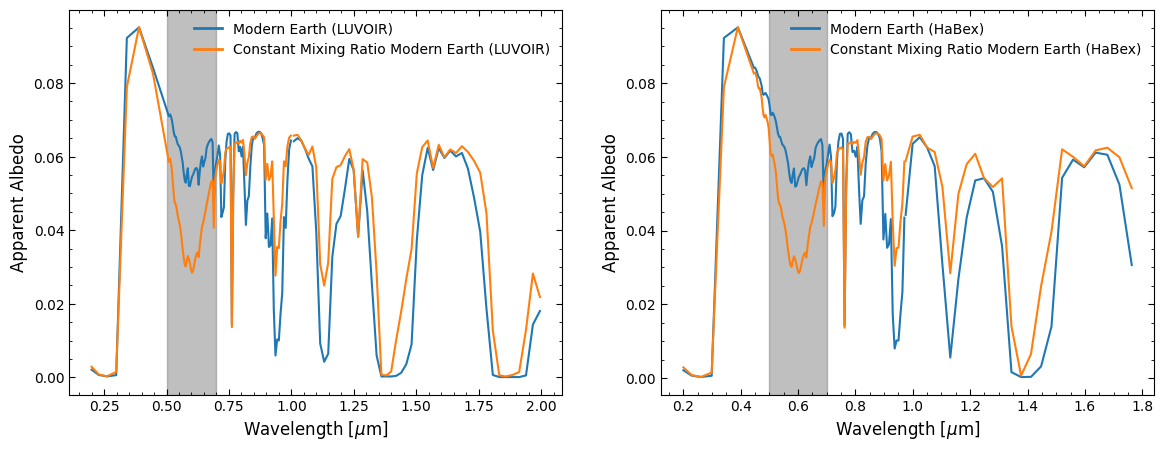

In [11]:
_, axs = plt.subplots(1, 2, figsize=(14, 5))

datavis.plot_spectrum(luvoir_df, label=None, instruments=instrument_groups["LUVOIR"], ax=axs[0], color="tab:blue")
datavis.plot_spectrum(luvoir_df_constant, label=None, instruments=instrument_groups["LUVOIR"], ax=axs[0], color="tab:orange")

datavis.plot_spectrum(habex_df, label=None, instruments=instrument_groups["HaBex"], ax=axs[1], color="tab:blue")
datavis.plot_spectrum(habex_df_constant, label=None, instruments=instrument_groups["HaBex"], ax=axs[1], color="tab:orange")

legend_elements = [
    Line2D([0], [0], color='tab:blue', lw=2, label='Modern Earth (LUVOIR)'),
    Line2D([0], [0], color='tab:orange', lw=2, label='Constant Mixing Ratio Modern Earth (LUVOIR)')
]
axs[0].legend(handles=legend_elements)

legend_elements_ss = [
    Line2D([0], [0], color='tab:blue', lw=2, label='Modern Earth (HaBex)'),
    Line2D([0], [0], color='tab:orange', lw=2, label='Constant Mixing Ratio Modern Earth (HaBex)')
]
axs[1].legend(handles=legend_elements_ss)

axs[0].axvspan(0.5, 0.7, color='gray', alpha=0.5)
axs[1].axvspan(0.5, 0.7, color='gray', alpha=0.5);